Training RMSE: 0.7196757085831575
Test RMSE: 0.7455813830127761
Training R2: 0.6125511913966952
Test R2: 0.5757877060324511


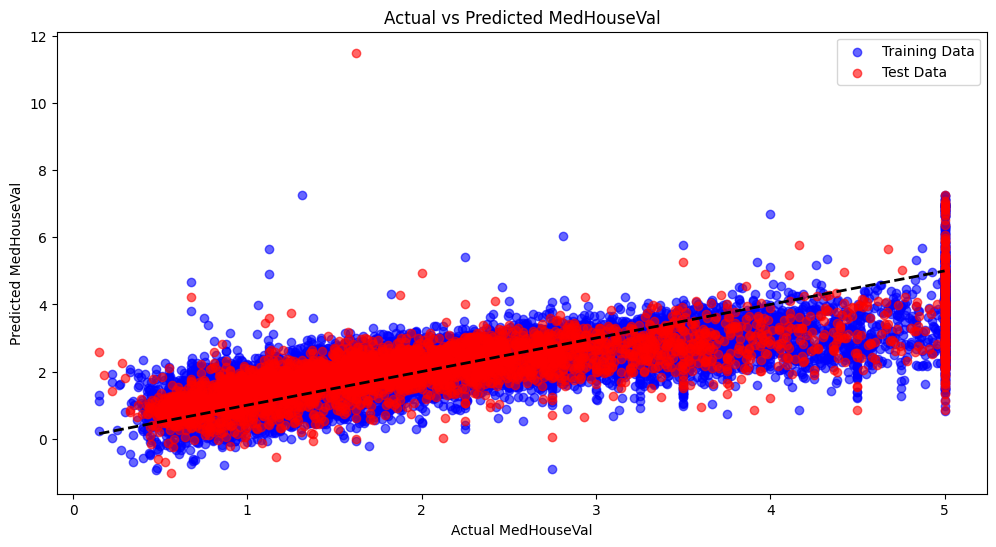

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

data.head()
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Training R2: {train_r2}')
print(f'Test R2: {test_r2}')

plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.6)
plt.scatter(y_test, y_test_pred, label='Test Data', color='red', alpha=0.6)
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linewidth=2, linestyle='--')
plt.xlabel('Actual MedHouseVal')
plt.ylabel('Predicted MedHouseVal')
plt.title('Actual vs Predicted MedHouseVal')
plt.legend()
plt.show()
